# Palmer Archipelago (Antarctica) Penguin Data

----

<img src='https://previews.123rf.com/images/aomeditor/aomeditor1903/aomeditor190300021/122254680-illustrator-of-body-parts-of-penguin.jpg'>

---

### About Dataset
**Source:**  
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

---

### Data Summary
The dataset consists of penguin measurements collected from three species in the Palmer Archipelago, Antarctica.

#### **`penguins_size.csv`**  
The data  containing the following fields:
- **species**: Penguin species (Chinstrap, Adelie, or Gentoo)
- **culmen_length_mm**: Culmen length (mm)
- **culmen_depth_mm**: Culmen depth (mm)
- **flipper_length_mm**: Flipper length (mm)
- **body_mass_g**: Body mass (g)
- **island**: Island name (Dream, Torgersen, or Biscoe)
- **gender**: Penguin gender (male/female)

---

## ***Table of Content***
Here is a Table of Contents cell for the notebook you provided:

---

## Table of Contents

1. **[Data Preprocessing](#Data-Preprocessing)**  
   - Importing Libraries  
   - Loading the Dataset  
   - Data Exploration (`info`, `describe`, null values)  
   - Renaming Columns  

2. **[Data Visualization](#Data-Visualization)**  
   - **[1D Visualization](#1D-Visualization)**  
     - Gender Distribution  
     - Species Distribution  
     - Island Distribution  
     - Boxplots for Culmen Length, Depth, Flipper Length, and Body Mass  
     - Distribution Plots of Numerical Features  
   - **[2D Visualization](#2D-Visualization)**  
     - Scatter Plots with Various Features and Species/Gender  
   - **[3D Visualization](#3D-Visualization)**  
     - Interactive Scatter Plots using Plotly  

3. **[Clustering](#Clustering)**
   - Data Encoding and Normalization  
   - **[K-Means Clustering](#K-Means-Clustering)**
     - Optimal Number of Clusters (Elbow Method)  
     - Cluster Visualizations for Different `k` Values  
   - **[Hierarchical Clustering](#Hierarchical-Clustering)**

     - Dendrogram Creation  


# Data Preprocessing

In [1]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from google.colab import drive
import seaborn as sns


In [2]:


# @title  Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# @title Load The Dataset
# Path to the dataset in Google Drive
file_path = '/content/drive/My Drive/penguins_size.csv'

# Load the dataset
df = pd.read_csv(file_path)
# rename columns
df.columns = ['species', 'island', 'culmen_length', 'culmen_depth', 'flipper_length', 'body_mass', 'gender']

In [4]:
# @title Read Sample of the df
df.sample(5)

,species,island,culmen_length,culmen_depth,flipper_length,body_mass,gender
142,Adelie,Dream,40.7,17.0,190,3725,MALE
110,Adelie,Biscoe,45.6,20.3,191,4600,MALE
10,Adelie,Torgersen,37.8,17.3,180,3700,FEMALE
256,Gentoo,Biscoe,44.4,17.3,219,5250,MALE
314,Gentoo,Biscoe,50.8,15.7,226,5200,MALE


In [5]:
# @title Describe and Info about the dataset
# @markdown - as we show we have a four numerical columns [culmen length ,depth ,flipper length , mass ]

# @markdown - and a three categorical columns [gender , island, specie]

print(df.info())
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         342 non-null    object 
 1   island          342 non-null    object 
 2   culmen_length   342 non-null    float64
 3   culmen_depth    342 non-null    float64
 4   flipper_length  342 non-null    int64  
 5   body_mass       342 non-null    int64  
 6   gender          342 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.8+ KB
None


,culmen_length,culmen_depth,flipper_length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
# @title Removing Null Values if exist !.
# @markdown - as we show there are no null values :)

df.isnull().sum()


,0
species,0
island,0
culmen_length,0
culmen_depth,0
flipper_length,0
body_mass,0
gender,0


# Data Visulaization
---
In this section, the goal is to explore and understand the dataset through various visual representation techniques. Here's a breakdown of the steps involved:

1D Visualization:

Focus on visualizing individual features or variables in the dataset.
Use plots such as histograms, bar charts to display distributions, frequencies,of single variables.
2D Visualization:

Examine relationships between two variables using scatter plots, heatmaps, or pair plots.

3D Visualization:

Analyze multivariate relationships by visualizing three or more dimensions.
Use 3D scatter plots,.


## 1D Visualisation

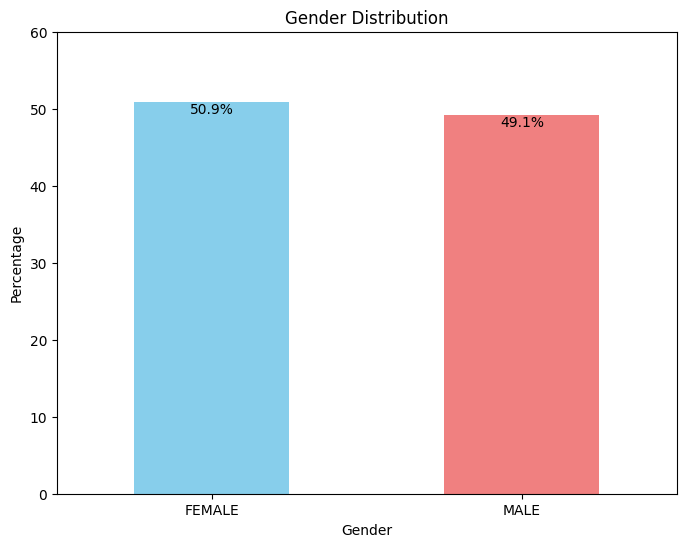

In [ ]:
# @title Gender Distribution

gender_counts = df['gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

for i, v in enumerate(gender_counts):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='top')

plt.ylim(0, 60)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


gender     FEMALE  MALE
species                
Adelie         78    73
Chinstrap      34    34
Gentoo         62    61


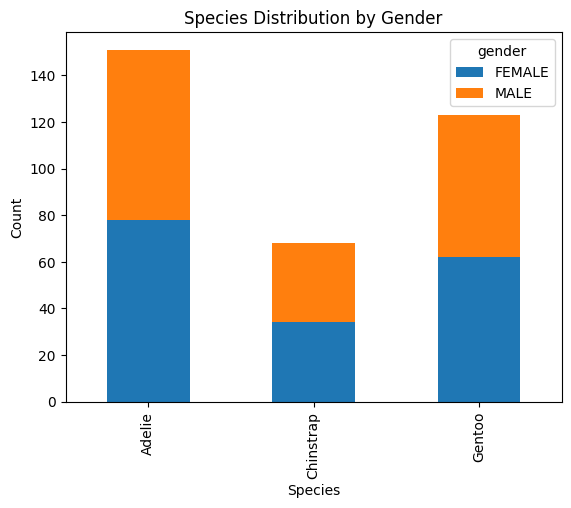

In [96]:
# @title The Species Distrbution by the Gender

# Create a cross-tabulation of species and gender
species_gender_counts = pd.crosstab(df['species'], df['gender'])

# Display the cross-tabulation
print(species_gender_counts)

# Plot the stacked bar chart
species_gender_counts.plot(kind='bar', stacked=True)
plt.title('Species Distribution by Gender')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

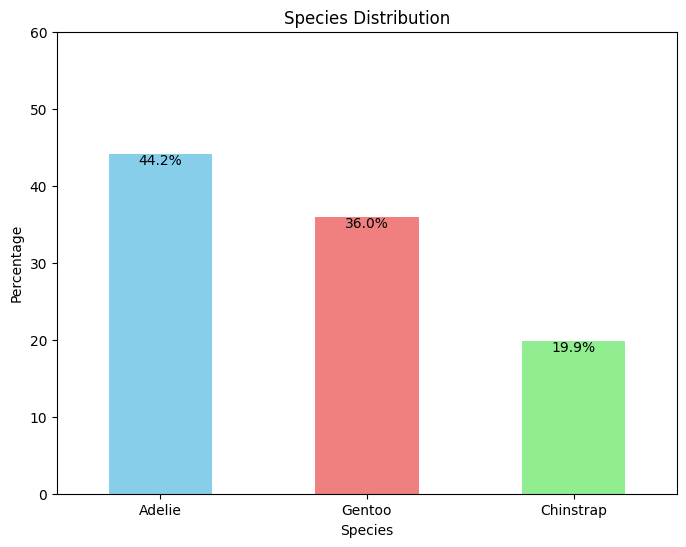

In [95]:
#@title Species Distribution

species_counts = df['species'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color=['skyblue', 'lightcoral','lightgreen'])

for i, v in enumerate(species_counts):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='top')

plt.ylim(0, 60)
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


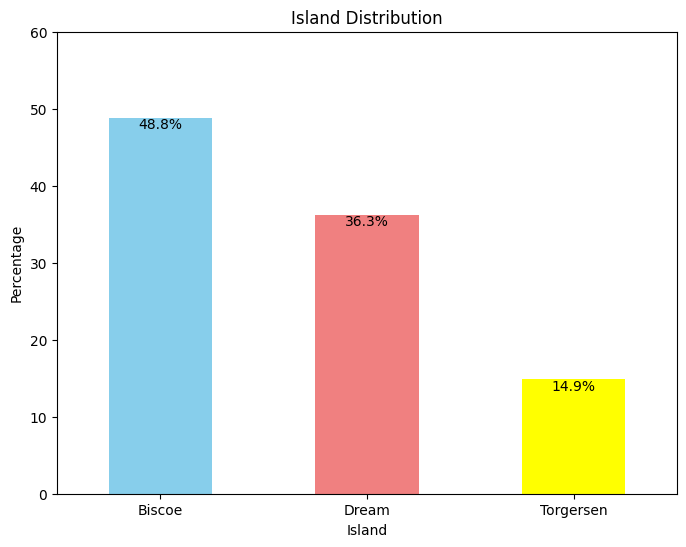

In [97]:
#@title Island Distribution
island_counts = df['island'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
island_counts.plot(kind='bar', color=['skyblue', 'lightcoral','yellow'])

#إضافة النسبة المئوية فوق الأعمدة
for i, v in enumerate(island_counts):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='top')

plt.ylim(0, 60)
plt.title('Island Distribution')
plt.xlabel('Island')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


Culmen Length Distribution


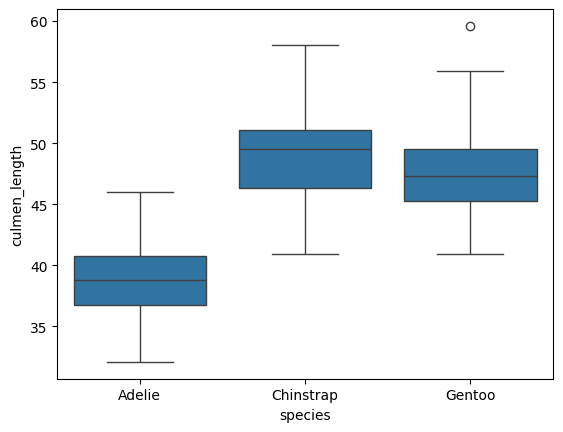

In [ ]:
# @title Culmen Length Distribution Across Species
print('Culmen Length Distribution')
sns.boxplot(data=df, x="species", y="culmen_length")
plt.show()

Culmen Depth Distribution


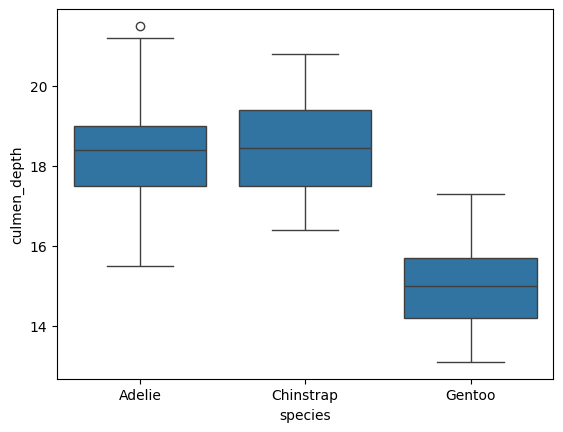

In [98]:
# @title Culmen Depth Distribution Across Species

print('Culmen Depth Distribution')
sns.boxplot(data=df, x="species", y="culmen_depth")
plt.xlabel='Species'
plt.ylabel='Culmen Depth'
plt.show()


Culmen Length Distribution


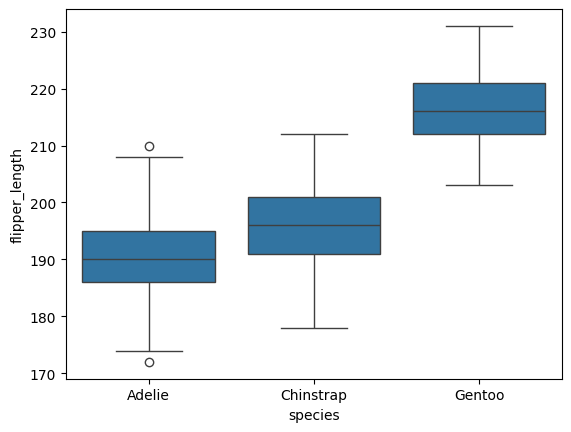

In [99]:
# @title Flipper  Length Distribution Across Species

print('Flipper Length Distribution')
sns.boxplot(data=df, x="species", y="flipper_length")
plt.xlabel='Species'
plt.ylabel='Flipper Length'
plt.show()


Body Mass Distribution


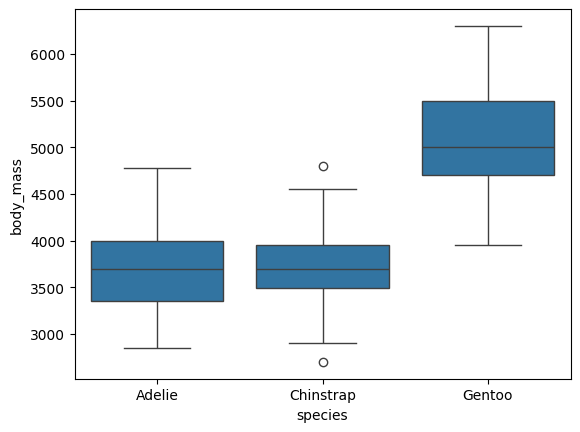

In [100]:
# @title Body Mass Distribution Across Species

print('Body Mass Distribution')

sns.boxplot(data=df, x="species", y="body_mass")
plt.show()

<ipython-input-27-ec8bf0fe2e7f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
<ipython-input-27-ec8bf0fe2e7f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
<ipython-input-27-ec8bf0fe2e7f>:6: UserWarning: 

`distplot` is a deprecated function and will be remo

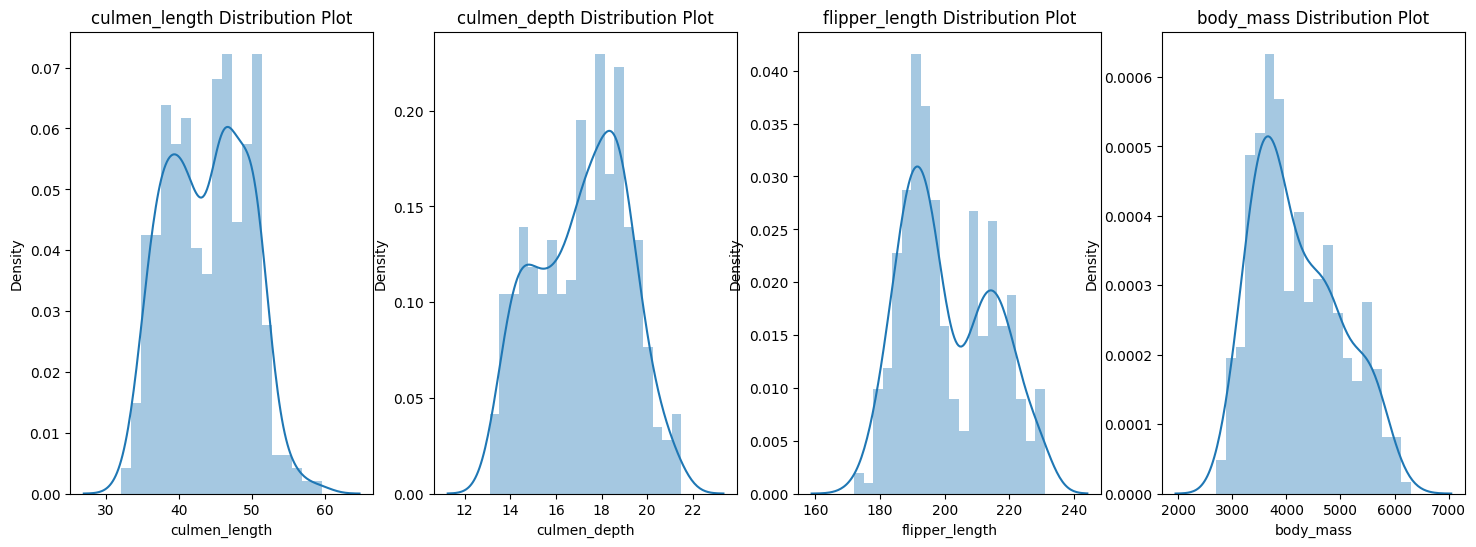

In [ ]:
# @title Histogram of the Numerical Values
plt.figure(figsize=(18, 6))
i=0
for x in  ['culmen_length', 'culmen_depth', 'flipper_length', 'body_mass']:
  i+=1
  plt.subplot(1,4,i)
  sns.distplot(df[x], bins=20)
  plt.title('{} Distribution Plot'.format(x))
plt.show()



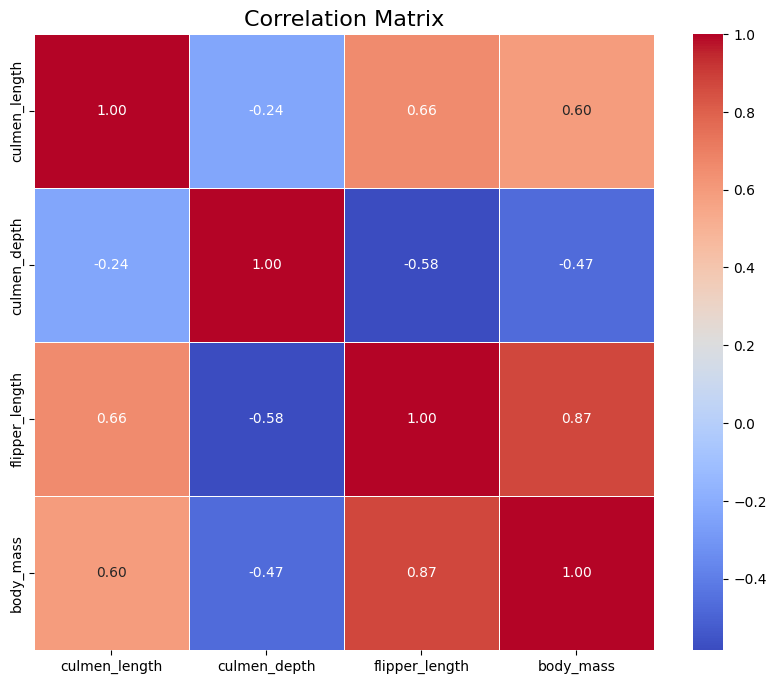

In [ ]:

#  @title  Heat Map for the correlation matrix

correlation_matrix = df[[ 'culmen_length', 'culmen_depth', 'flipper_length', 'body_mass']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()


## 2Dimensison  Visulaisation

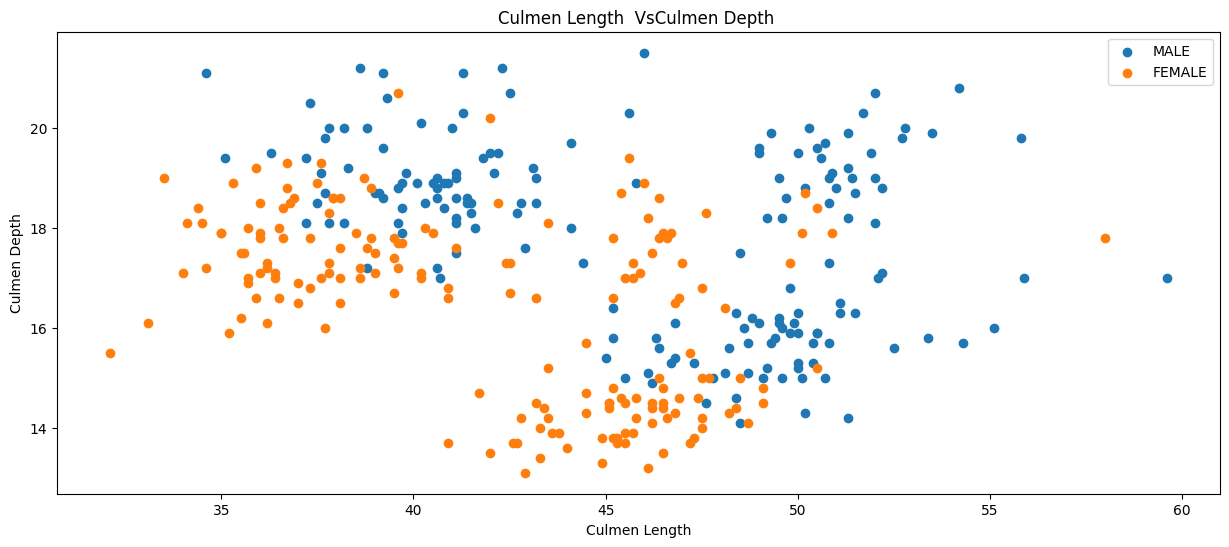

In [9]:
# @title Culmen Length Vs. Culmen Depth on Gender

plt.figure(figsize=(15, 6))
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    plt.scatter(subset['culmen_length'], subset['culmen_depth'], label=gender)
plt.title('Culmen Length  VsCulmen Depth ')
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')
plt.legend()
plt.show()

culmen_length vs culmen_depth


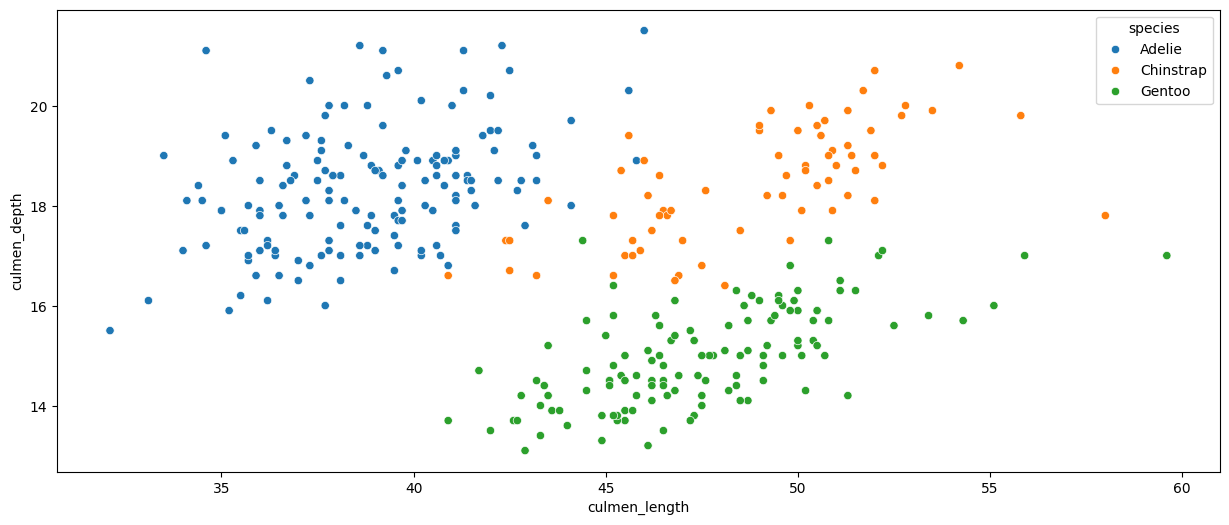

In [10]:
# @title Culmen Length Vs Culmen Depth on Species
plt.figure(figsize=(15, 6))
print('culmen_length vs culmen_depth')
sns.scatterplot(data=df, x='culmen_length', y='culmen_depth', hue='species')
plt.show()

culmen_length vs body mass 


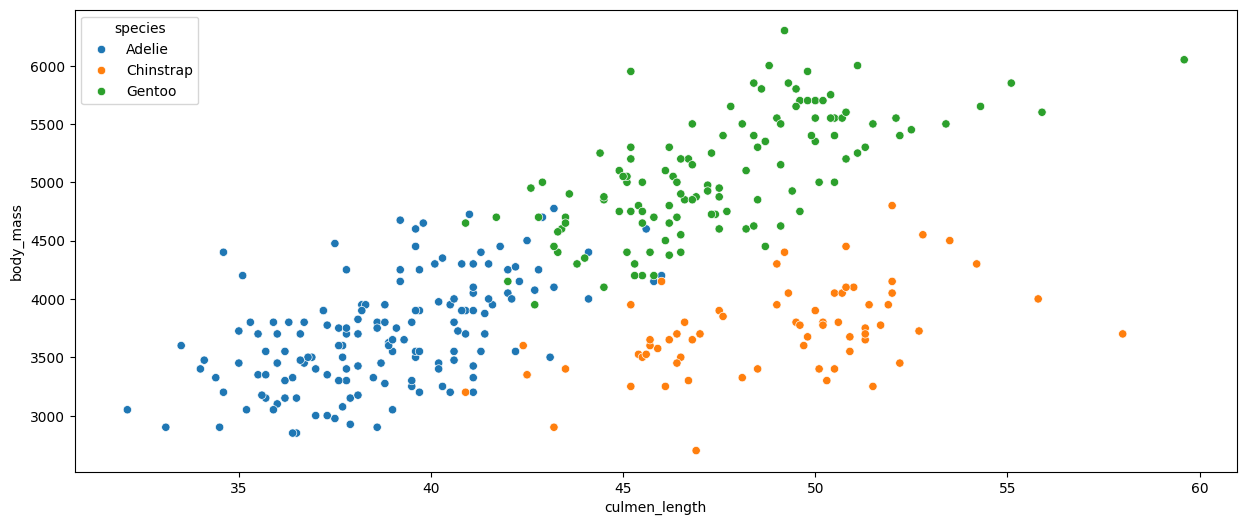

In [11]:
# @title Culmen Length V Body Mass on Species
plt.figure(figsize=(15, 6))
print('culmen_length vs body mass ')
sns.scatterplot(data=df, x='culmen_length', y='body_mass', hue='species')
plt.show()

flipper length vs culmen_depth


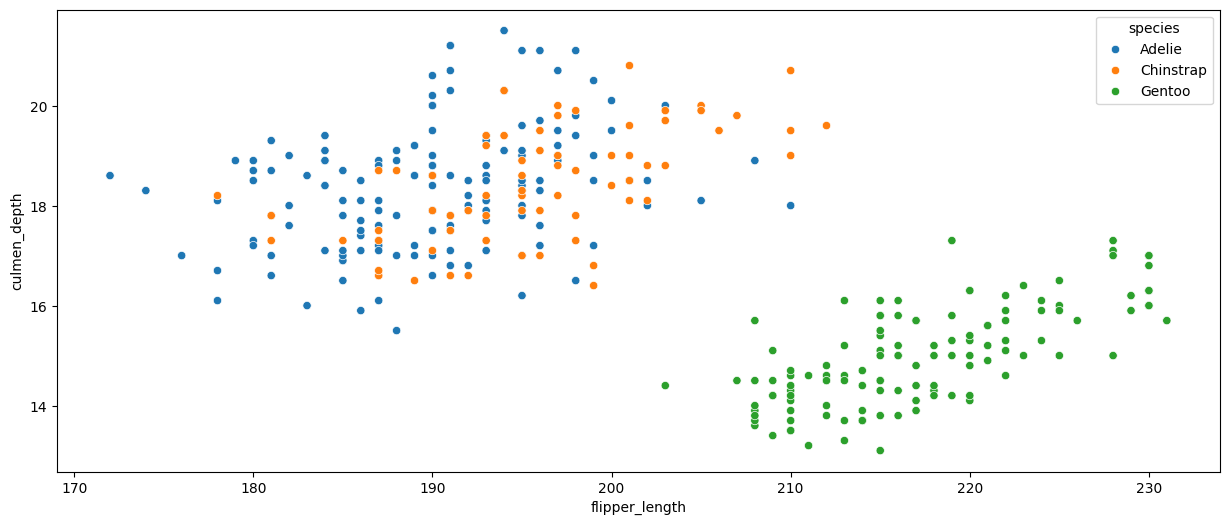

In [12]:
# @title Flipper Length Vs Culmen Depth on Species
plt.figure(figsize=(15, 6))
print('flipper length vs culmen_depth')
sns.scatterplot(data=df, x='flipper_length', y='culmen_depth', hue='species')
plt.show()

flipper length vs culmen_depth


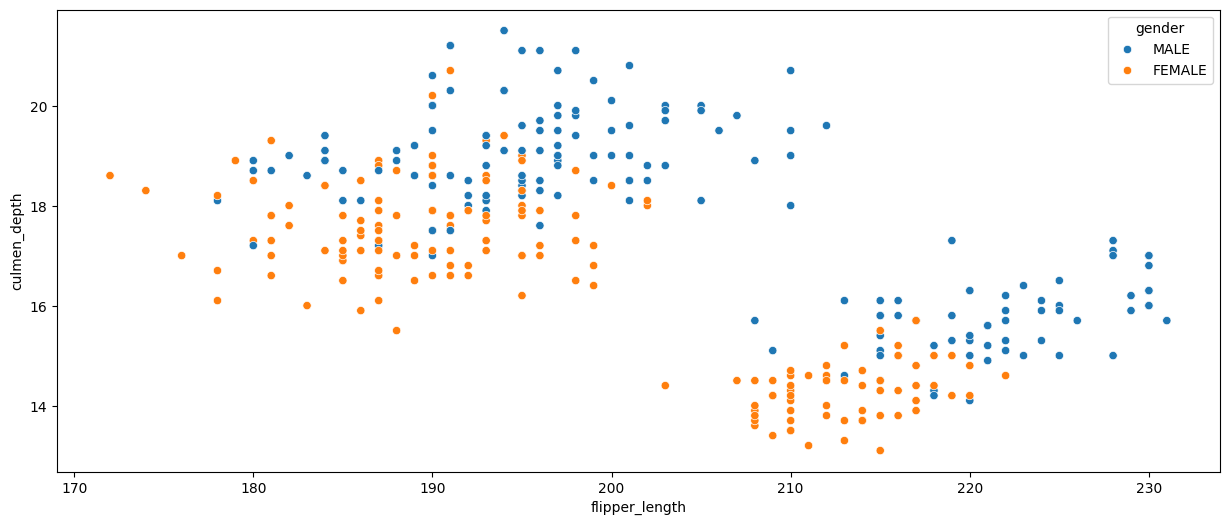

In [13]:
# @title Flipper  Length Vs Culmen Depth on Gender
plt.figure(figsize=(15, 6))
print('flipper length vs culmen_depth')
sns.scatterplot(data=df, x='flipper_length', y='culmen_depth', hue='gender')
plt.show()

culmen_length vs culmen_depth


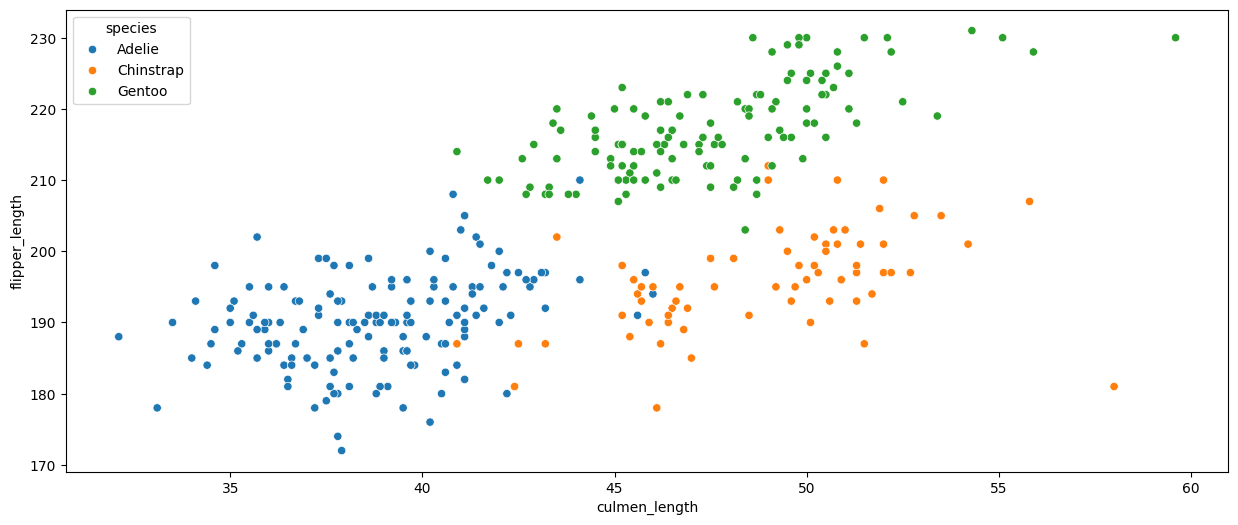

In [14]:
# @title Culmen Length Vs Flipper Length  Species
plt.figure(figsize=(15, 6))
print('culmen_length vs culmen_depth')
sns.scatterplot(data=df, x='culmen_length', y='flipper_length', hue='species')
plt.show()

## 3D Visualisation

In [ ]:
# @title 3d Scatter for Culmen Length, Culmen Depth , Body Mass on Species
import plotly.express as px

# Ensure column names are correctly spelled
fig = px.scatter_3d(
    df,
    x='flipper_length',  # Corrected spelling
    y='culmen_length',
    z='body_mass',
    color='species',
    title='Interactive 3D Scatter Plot of Clusters'
)

fig.show()


In [ ]:
# @title 3d Scatter for Culmen Length, Culmen Depth ,Flipper Length on Species

# Ensure column names are correctly spelled
fig = px.scatter_3d(
    df,
    x='flipper_length',  # Corrected spelling
    y='culmen_length',
    z='culmen_depth',
    color='species',
    title='Interactive 3D Scatter Plot of Clusters'
)

fig.show()


In [ ]:
# @title 3d Scatter for Culmen Length, Flipper Length, Body Mass on Species

# Ensure column names are correctly spelled
fig = px.scatter_3d(
    df,
    x='flipper_length',  # Corrected spelling
    y='culmen_length',
    z='body_mass',
    color='island',
    title='Interactive 3D Scatter Plot of Clusters'
)

fig.show()


# Clustering

## K Means clustering

In [7]:

# @title Encoding categorical features
categorical_cols =  ['species', 'island', 'gender']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [8]:

# @title Normalizing numerical features
scaler = StandardScaler()
numerical_cols =  ['culmen_length', 'culmen_depth', 'flipper_length', 'body_mass']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [9]:
# @title Dimensionality Reduction to 2 with PCA
pca = PCA(n_components=2)
cols= ['culmen_length', 'culmen_depth', 'flipper_length', 'body_mass','gender']
reduced_data = pca.fit_transform(df[cols])
print("Explained variance by PCA components:", pca.explained_variance_ratio_)


Explained variance by PCA components: [0.65151326 0.20883281]


In [21]:
# @title K Mean with Two Cluster
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[cols])

# Evaluate clustering
silhouette_avg = silhouette_score(df[cols], kmeans.labels_)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


Silhouette Score for 2 clusters: 0.502233872804852


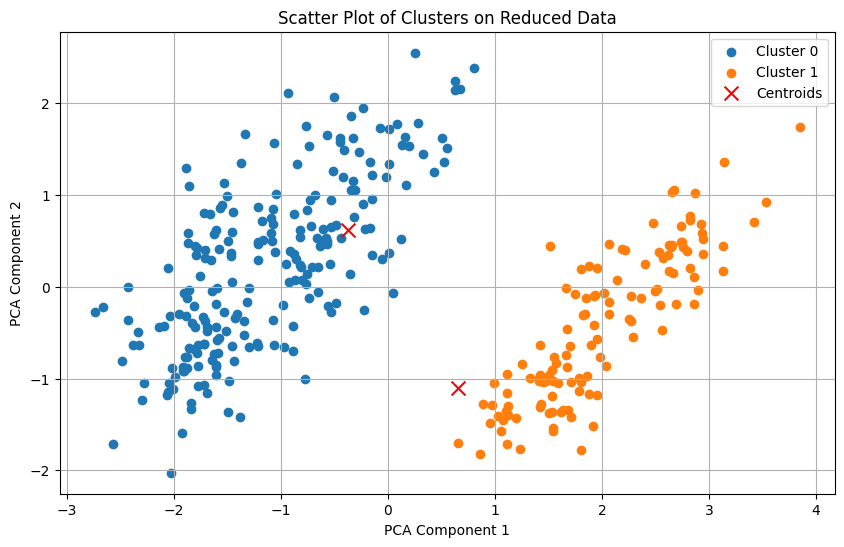

In [11]:
# @title Clusters Plotig
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = reduced_data[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data[:, 0],  # PCA Component 1 for x-axis
        cluster_data[:, 1],  # PCA Component 2 for y-axis
        label=f"Cluster {cluster}"
    )

# Add centroids to the scatter plot
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='x',
    s=100,
    label='Centroids'
)

# Plot settings
plt.title("Scatter Plot of Clusters on Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [20]:

# @title K Mean With 3 Clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[cols])

# Evaluate clustering
silhouette_avg = silhouette_score(df[cols], kmeans.labels_)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


Silhouette Score for 3 clusters: 0.4097747007102627


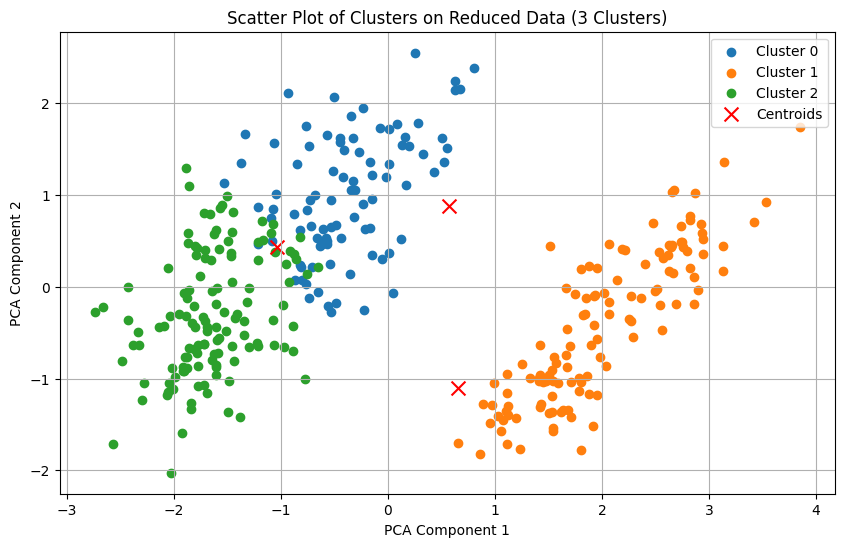

In [13]:
# @title Ploting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = reduced_data[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data[:, 0],  # PCA Component 1 for x-axis
        cluster_data[:, 1],  # PCA Component 2 for y-axis
        label=f"Cluster {cluster}"
    )

# Add centroids to the scatter plot
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='x',
    s=100,
    label='Centroids'
)

# Plot settings
plt.title("Scatter Plot of Clusters on Reduced Data (3 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

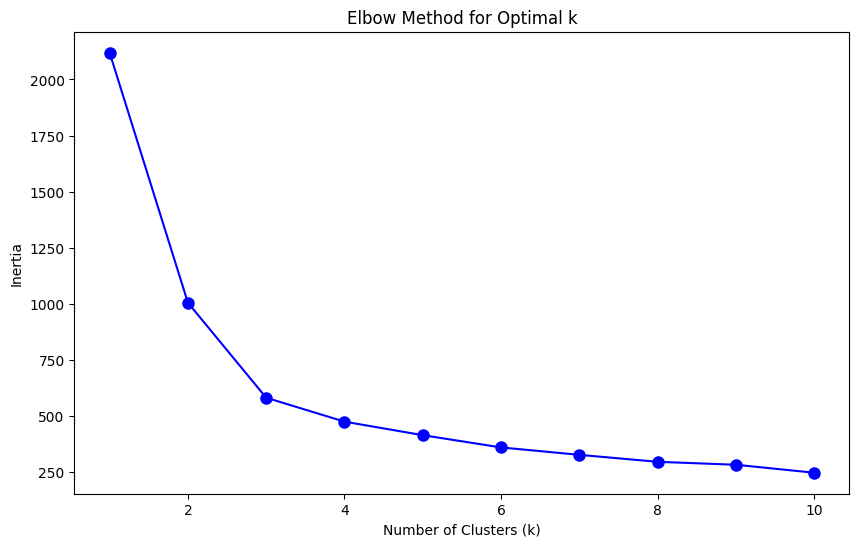

The optimal number of clusters (k) is: 8


In [14]:
# @title Eblow Method
inertias = list()
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(df[df.columns])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = k_range[np.argmin(np.diff(np.diff(inertias)))]
print(f'The optimal number of clusters (k) is: {optimal_k}')

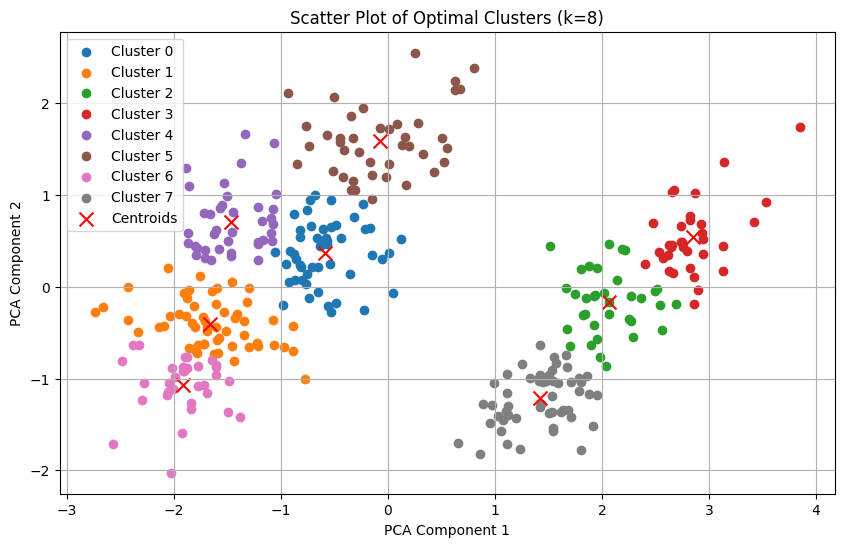

In [17]:
# @title Perform clustering with optimal k
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(df[cols])

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['Optimal Cluster'] = kmeans_optimal.fit_predict(reduced_data)

#  Plot the scatter plot for optimal k clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = reduced_data[df['Optimal Cluster'] == cluster]
    plt.scatter(
        cluster_data[:, 0],  # PCA Component 1
        cluster_data[:, 1],  # PCA Component 2
        label=f"Cluster {cluster}"
    )

# Add centroids
centroids = kmeans_optimal.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='x',
    s=100,
    label='Centroids'
)

# Plot settings
plt.title(f"Scatter Plot of Optimal Clusters (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

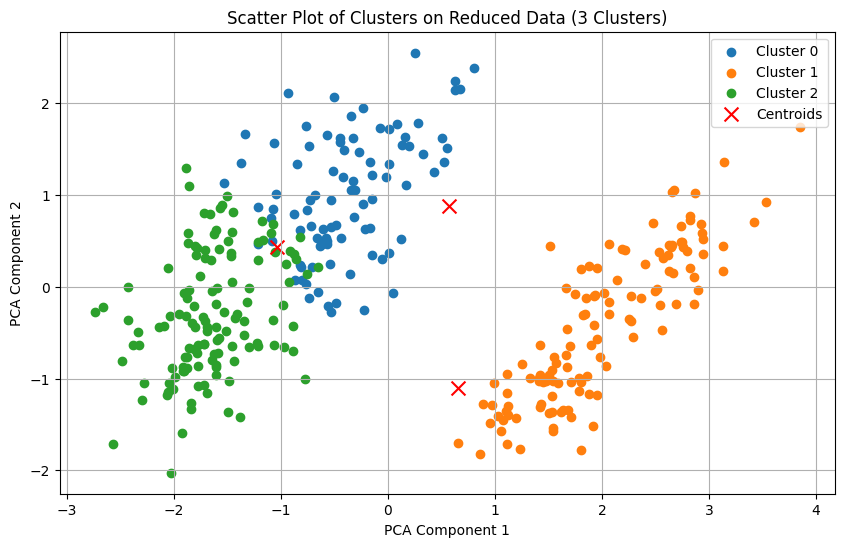

In [ ]:

# @title K Mean With 3 Clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[cols])

# @title Ploting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = reduced_data[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data[:, 0],  # PCA Component 1 for x-axis
        cluster_data[:, 1],  # PCA Component 2 for y-axis
        label=f"Cluster {cluster}"
    )

# Add centroids to the scatter plot
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='x',
    s=100,
    label='Centroids'
)

# Plot settings
plt.title("Scatter Plot of Clusters on Reduced Data (3 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# @title Scoring Clustering
# @markdown when we score the i=optimal k we get 0.23 score which is smaler
# @markdown than the  score in the caase of k=3

silhouette_avg = silhouette_score(df[cols], kmeans_optimal.labels_)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

Silhouette Score for 8 clusters: 0.23927304550304646


## Herachical Clustering

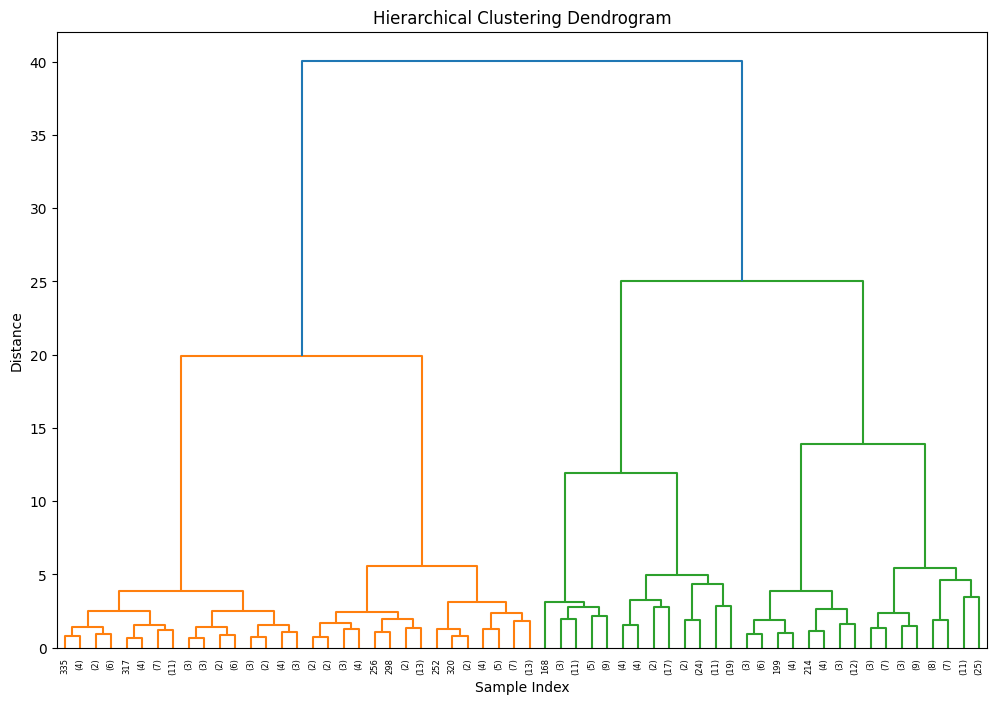

In [ ]:
# @title Bottom Up Herarchical Clustering
# Create the linkage matrix
linkage_matrix = linkage(normalized_data, method='ward')  # 'ward', 'complete', 'average'

#  Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode="level", p=5, labels=df.index, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


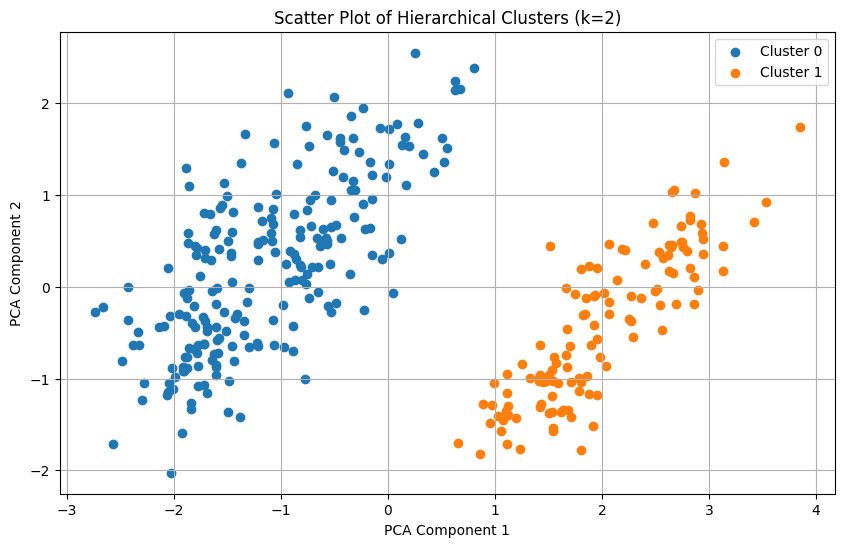

In [ ]:
# @title Top Down Herarchical Clustering
# Perform Agglomerative Clustering
n_clusters = 2  # Use the previously computed optimal k
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
df['Hierarchical Cluster'] = hierarchical_model.fit_predict(df[cols])

# Step 5: Plot clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = reduced_data[df['Hierarchical Cluster'] == cluster]
    plt.scatter(
        cluster_data[:, 0],  # PCA Component 1
        cluster_data[:, 1],  # PCA Component 2
        label=f"Cluster {cluster}"
    )

# Plot settings
plt.title(f"Scatter Plot of Hierarchical Clusters (k={n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
